In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Visualize the dataset

Target labels:  [6 1 6 4 8 1 2 9 0 9]


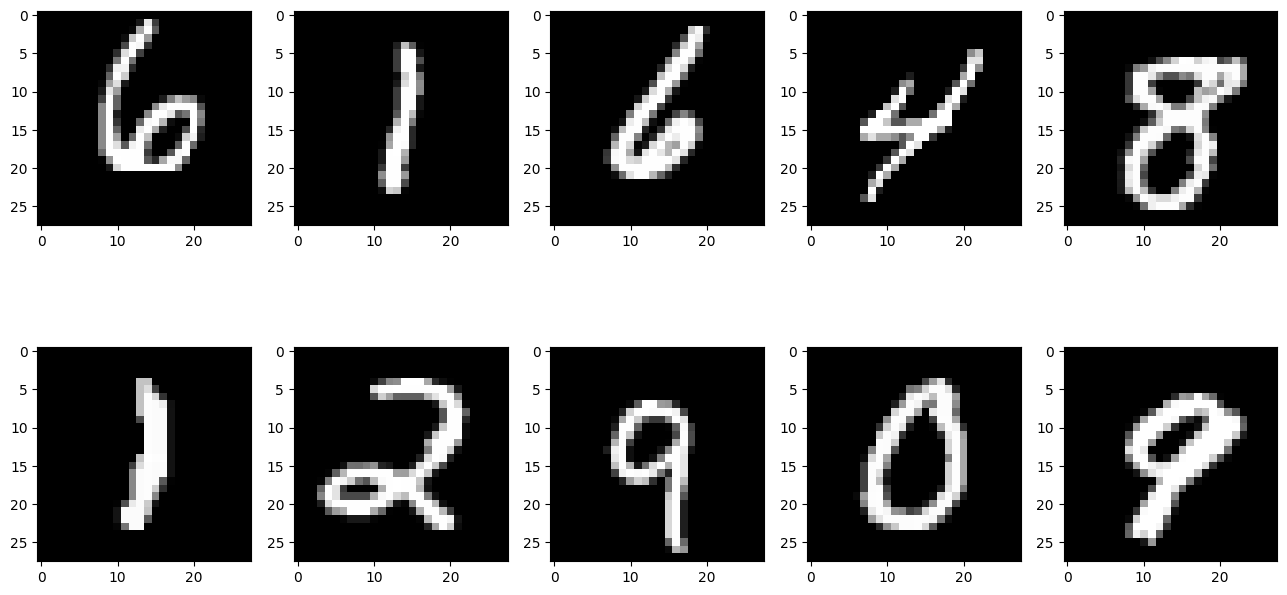

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2909 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1296 - accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0936 - accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0759 - accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0400 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

Plot the loss and accuracy graphs

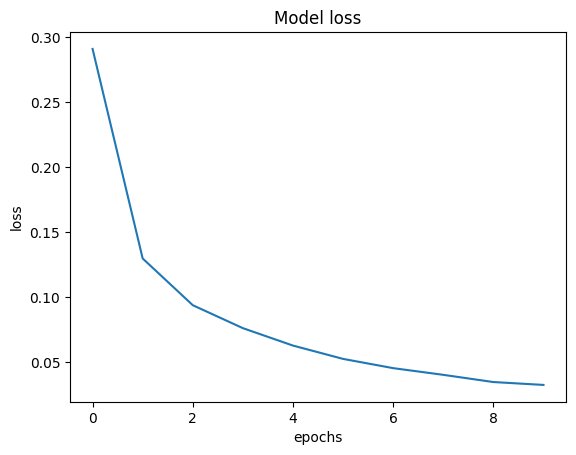

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

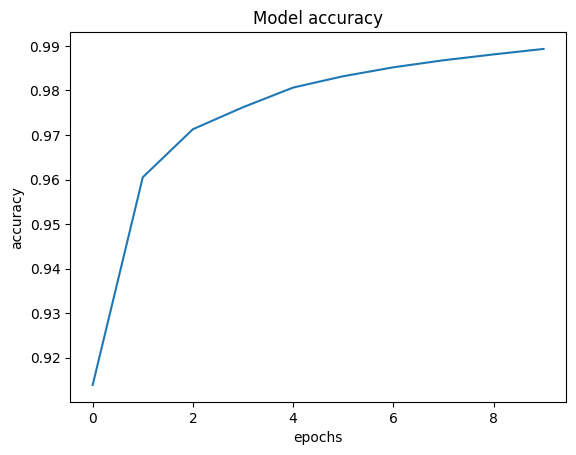

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.1096 - accuracy: 0.9697
Loss of the Test dataset is: 0.1096164658665657
Accuracy of the test dataset is: 0.9696999788284302


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
469/469 - 11s - 23ms/step - accuracy: 0.9176 - loss: 0.3980 - val_accuracy: 0.9561 - val_loss: 0.2476
Epoch 2/20
469/469 - 10s - 21ms/step - accuracy: 0.9650 - loss: 0.2253 - val_accuracy: 0.9740 - val_loss: 0.1856
Epoch 3/20
469/469 - 9s - 19ms/step - accuracy: 0.9738 - loss: 0.1916 - val_accuracy: 0.9788 - val_loss: 0.1776
Epoch 4/20
469/469 - 10s - 22ms/step - accuracy: 0.9774 - loss: 0.1728 - val_accuracy: 0.9757 - val_loss: 0.1827
Epoch 5/20
469/469 - 8s - 18ms/step - accuracy: 0.9802 - loss: 0.1615 - val_accuracy: 0.9777 - val_loss: 0.1712
Epoch 6/20
469/469 - 11s - 23ms/step - accuracy: 0.9832 - loss: 0.1496 - val_accuracy: 0.9787 - val_loss: 0.1641
Epoch 7/20
469/469 - 8s - 18ms/step - accuracy: 0.9838 - loss: 0.1437 - val_accuracy: 0.9794 - val_loss: 0.1606
Epoch 8/20
469/469 - 8s - 17ms/step - accuracy: 0.9833 - loss: 0.1435 - val_accuracy: 0.9823 - val_loss: 0.1526
Epoch 9/20
469/469 - 10s - 21ms/step - accuracy: 0.9858 - loss: 0.1359 - val_accuracy: 0.9841 - val_

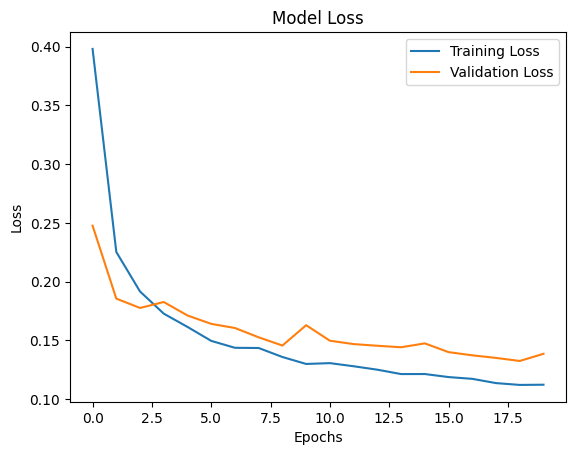

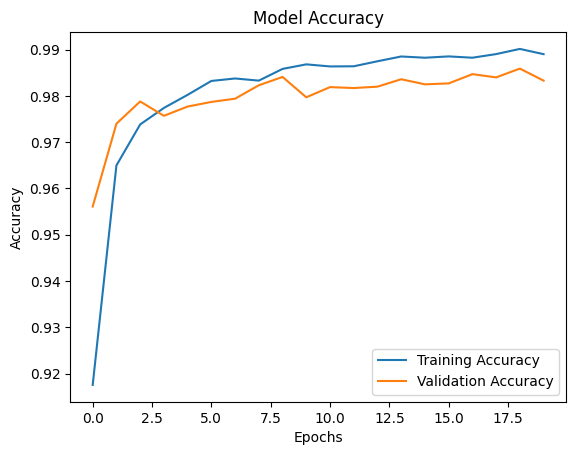


Final Test Accuracy: 98.33%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


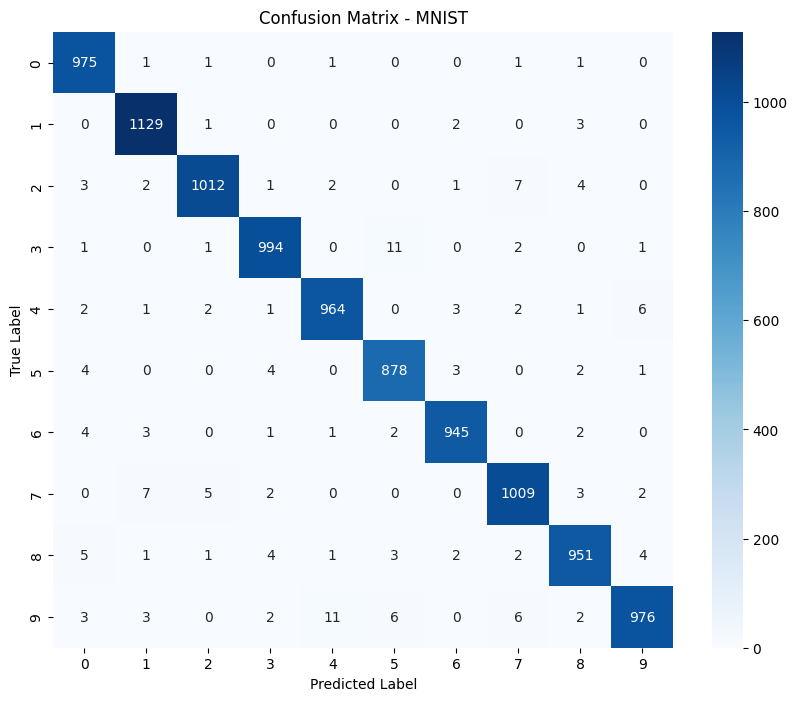


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [1]:
# ------------------------------
# MLP with MNIST - Lab 2 Q3 Modified
# Google Colab ready
# ------------------------------

# 1. Imports
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 2. Load MNIST dataset
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# 3. Normalize data
new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

# 4. One-hot encode labels
new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

# 5. Build MLP model with L1 & L2 regularization and improved architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

# Increased neurons + L1 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=l1(1e-5)))
model.add(Dropout(0.2))

# Increased neurons + L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.2))

# Extra hidden layer for better learning
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile with tuned optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 6. Train the model
train_info = model.fit(new_train_data, new_train_target,
                       validation_data=(new_test_data, new_test_target),
                       epochs=20,
                       batch_size=128,
                       verbose=2)

# 7. Plot loss
plt.plot(train_info.history['loss'], label='Training Loss')
plt.plot(train_info.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# 8. Plot accuracy
plt.plot(train_info.history['accuracy'], label='Training Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# 9. Evaluate final test accuracy
test_loss, test_acc = model.evaluate(new_test_data, new_test_target, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")

# 10. Confusion Matrix & Classification Report
y_pred_probs = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MNIST")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))
